# Multiple Linear Regressions with Spotify data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('clean-Spotify.csv')
df

,Unnamed: 0,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
3,4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
4,5,6,The Road Ahead (Miles Of The Unknown),City To City,alternative pop rock,2004,99,46,54,-9,14,14,247,0,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1985,1986,Blue Suede Shoes,Elvis Presley,adult standards,1956,95,66,56,-8,14,96,119,65,6,62
1543,1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1544,1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1545,1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


Our first step was to plot correlations of all the quantitative features with popularity to find the features with the strongest relationships with popularity.

Correlations
Danceability: 0.1196216657740888
Energy: 0.08190291423099948
Length: 0.00931908937971644
Speechiness:  0.05798857537935961
Loudness:  0.11892291778199586
Liveness:  -0.037917164769066404
Valence:  0.0845408685291041
Beats Per Minute:  -0.006985636976298665
Acousticness:  -0.06797955332469441
0.7071831529493542


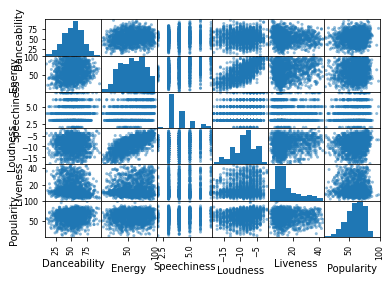

In [ ]:
from pandas.plotting import *

corr1 = df['Danceability'].corr(df['Popularity'])
corr2 = df['Energy'].corr(df['Popularity'])
corr3 = df['Length'].corr(df['Popularity'])
corr4 = df['Speechiness'].corr(df['Popularity'])
corr5 = df['Loudness'].corr(df['Popularity'])
corr6 = df['Liveness'].corr(df['Popularity'])
corr7 = df['Valence'].corr(df['Popularity'])
corr8 = df['Beats Per Minute (BPM)'].corr(df['Popularity'])
corr9 = df['Acousticness'].corr(df['Popularity'])

print("Correlations")
print('Danceability:',corr1)
print('Energy:',corr2)
print('Length:',corr3)
print('Speechiness: ',corr4)
print('Loudness: ',corr5)
print('Liveness: ',corr6)
print('Valence: ',corr7)
print('Beats Per Minute: ',corr8)
print('Acousticness: ',corr9)

Subset = df[['Danceability','Energy','Speechiness','Loudness','Liveness','Popularity']]
pd.plotting.scatter_matrix(Subset)

energy_loudness_corr = df['Energy'].corr(df['Loudness'])
print(energy_loudness_corr)

We found the features with the highest correlations with popularity to be: Danceability, loudness, valence, energy

Our highest R is danceability .1196, which would be a baseline R^2 of .01430.

There exists a high correlation between energy and loudness, as an interesting note. There are no other notable  correlations between the other factors, as seen in the correlation matrix.

Next, we will create multiple linear regressions per the following:

1. danceability, energy, valence
2. danceability, loudness, valence

3. danceability, energy

In [ ]:
features=['Danceability','Energy','Valence']
X = df[features]
y = df['Popularity']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X[features], y, train_size=0.5, random_state=8)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.015937899695951163

In [ ]:
print(lr.intercept_)
print(lr.coef_)

52.543192239825714
[ 0.06205344  0.06813382 -0.00525045]


In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.015937899695951163
11.481994857635357
197.69131421596182
14.060274329328067


The R^2 of linear regression with the 3 top performing features is .0159, which is not significantly higher than the danceability R^2.

The RMSE is 14, which is high.

## Multiple Linear Regression with 3 features
We created a multiple linear regression with another combination of 3 features with highest correlations with popularity: danceability, loudness, and valence. We excluded energy because of its high correlation with loudness, as we didn't want any confounding factors.

In [ ]:
from sklearn.linear_model import LinearRegression

my_mX = np.vstack((df['Danceability'],df['Loudness'],df['Valence'])).T
my_mY = np.vstack((df['Popularity'], )).T

mreg = LinearRegression().fit(my_mX, my_mY)

print(mreg.coef_)
print(mreg.intercept_)

[[0.10755934 0.50255658 0.0094265 ]]
[57.87713873]


In [ ]:
print('Coefficient of determination:',mreg.score(my_mX, my_mY))

Coefficient of determination: 0.028386945176867906


We found the coefficient of determination to be very low, 0.03, so we concluded that this was not a good model to predict popularity.

## Multiple Linear Regression with 2 features
We created a multiple linear regression with the 2 features with highest correlations with popularity: danceability and loudness.

In [ ]:
from sklearn.linear_model import LinearRegression

my_mX = np.vstack((df['Danceability'],df['Loudness'])).T
my_mY = np.vstack((df['Popularity'], )).T

mreg = LinearRegression().fit(my_mX, my_mY)

print(mreg.coef_)
print(mreg.intercept_)

[[0.11588692 0.50869076]]
[57.95100769]


In [ ]:
print('Coefficient of determination:',mreg.score(my_mX, my_mY))

Coefficient of determination: 0.028195498002168473


We found the coefficient of determination to be very low, 0.03, so we concluded that this was not a good model to predict popularity.

Thus, we concluded that linear regressions are not a good model for the Spotify data since we didn't get strong R^2s for any of our models. Next, we decided to create a classification model since our regression models were not strong and did not meet our 50% accuracy expectation.

The data did not seem to meet our hypothesis on the correlations of each attribute with popularity. Though danceability, energy, and valence all correlate positively with popularity, their respective R^2 factors are generally small. We also did not expect loudness to have the greatest correlation, nor liveness, BPM, and acousticness to have negative correlations.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ebc7ed57-9d9b-4197-9f19-b17d7bdf5e26' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>